In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import PIL.Image as Image
import tensorflow as tf

import tensorflow_hub as hub
from matplotlib import pyplot as plt
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
)
imagenet_labels = np.array(open(labels_path).read().splitlines())



In [3]:
IMAGE_SHAPE = (224, 224) 
local_model_path  = "C:/Users/USER/Desktop/Machine Learning self taught/Deep Learning course/mobilenet-v2-tensorflow2-100-224-classification-v2"

classifier = tf.keras.Sequential([
    hub.KerasLayer(local_model_path, input_shape=IMAGE_SHAPE + (3,))
])

In [4]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

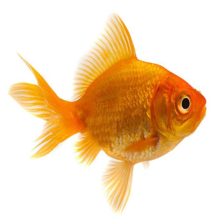

In [5]:
goldfish= Image.open("C:/Users/USER/Desktop/Machine Learning self taught/Deep Learning course/goldfish.jpg").resize(IMAGE_SHAPE)
goldfish

In [6]:
goldfish= np.array(goldfish)/255.0
goldfish.shape

(224, 224, 3)

In [7]:
goldfish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [8]:
#lets Predict the goldfish class in the 1000 classes!

result = classifier.predict(goldfish[np.newaxis, ...])
result.shape

(1, 1001)

In [9]:
predicted_label= np.argmax(result)
predicted_label

2

In [10]:
image_label= []
with open("C:/Users/USER/Desktop/Machine Learning self taught/Deep Learning course/Book1.txt", "r") as f:
    image_label= f.read().splitlines()
image_label[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [11]:
image_label[predicted_label]

'goldfish'

In [12]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_read = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir=".", untar=True)

In [13]:
data_read

'.\\datasets\\flower_photos'

In [14]:
import pathlib
data_read = pathlib.Path(data_read)
data_read

WindowsPath('datasets/flower_photos')

In [15]:
roses = list(data_read.glob('tulips/*'))
roses[:3]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg')]

In [16]:
flowers_images_dict = {
    'roses':list(data_read.glob('roses/*')),
    'daisy':list(data_read.glob('daisy/*')),
    'dandelions':list(data_read.glob('dandelions/*')), 
    'sunflower':list(data_read.glob('sunflower/*')), 
    'tulips':list(data_read.glob('tulips/*')),
}

In [17]:
flower_labels_dictionary = {
    'roses': 0, 
    'daisy':1, 
    'dandelion':2, 
    'sunflower':3, 
    'tulips':4
}

In [20]:
tulips = list(data_read.glob('tulips/*'))
PIL.Image.open(str(tulips[10]))

NameError: name 'PIL' is not defined

In [21]:
str(flowers_images_dict['daisy'][0])

'datasets\\flower_photos\\daisy\\100080576_f52e8ee070_n.jpg'

In [22]:
img= cv2.imread(str(flowers_images_dict['daisy'][0]))
img.shape

(263, 320, 3)

In [23]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [24]:
X, y= [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))  # Added the missing ')'
        
        resize_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resize_img)
        y.append(flower_labels_dictionary[flower_name])

In [25]:
X[0]/255

array([[[0.        , 0.05882353, 0.02352941],
        [0.        , 0.05882353, 0.02352941],
        [0.        , 0.0627451 , 0.02745098],
        ...,
        [0.09411765, 0.2       , 0.12156863],
        [0.09803922, 0.20392157, 0.1254902 ],
        [0.10196078, 0.20784314, 0.12941176]],

       [[0.03137255, 0.08627451, 0.05490196],
        [0.03137255, 0.08627451, 0.05490196],
        [0.02745098, 0.08235294, 0.05490196],
        ...,
        [0.08235294, 0.18431373, 0.12156863],
        [0.09411765, 0.19215686, 0.13333333],
        [0.09803922, 0.2       , 0.1372549 ]],

       [[0.04705882, 0.08627451, 0.05882353],
        [0.04705882, 0.08627451, 0.05882353],
        [0.04313725, 0.08627451, 0.05490196],
        ...,
        [0.08235294, 0.16862745, 0.12156863],
        [0.09411765, 0.18039216, 0.12941176],
        [0.10196078, 0.18823529, 0.14117647]],

       ...,

       [[0.06666667, 0.11372549, 0.09803922],
        [0.05490196, 0.09803922, 0.07843137],
        [0.05098039, 0

In [26]:
X= np.array(X)
y= np.array(y)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
X_train_scaled= X_train/255
X_test_scaled= X_test/255

In [29]:
goldfish= np.array(goldfish)/255.0
goldfish.shape

(224, 224, 3)

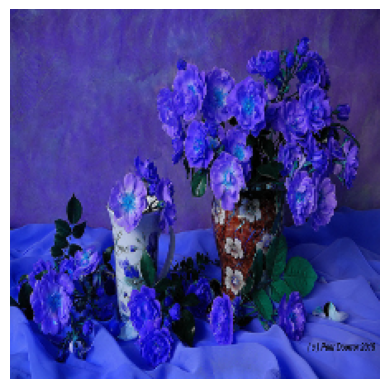

In [30]:
plt.axis("off")
plt.imshow(X[150])

In [31]:
predicted= classifier.predict(np.array([X[0], X[1], X[2]]))
predicted= np.argmax(predicted, axis=1)
predicted

array([795, 880, 795], dtype=int64)

In [32]:
image_label[880]

'umbrella'

In [33]:
# building the final model for transfer learning, where u have all teh models "freezed": meaning they are on the same scale. except the last one which is only Softmax

#Trainable:false, means do not train, its fixed scale

In [34]:
local_feature_extractor_path = "C:/Users/USER/Desktop/Machine Learning self taught/Deep Learning course/Final_model"

# Load the pretrained model without the top layer
pretrained_model_without_top_layer = hub.KerasLayer(
    local_feature_extractor_path,
    input_shape=(224, 224, 3),
    trainable=False
)


In [35]:
num_of_flowers = 5
model= tf.keras.Sequential([
    pretrained_model_without_top_layer, 
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [36]:
model.compile(
    optimizer= 'adam', 
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics= ['acc'])
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
49/49 [==============================] - 51s 760ms/step - loss: 0.6474 - acc: 0.7278
Epoch 2/5
49/49 [==============================] - 41s 835ms/step - loss: 0.3058 - acc: 0.8900
Epoch 3/5
49/49 [==============================] - 41s 839ms/step - loss: 0.2329 - acc: 0.9176
Epoch 4/5
49/49 [==============================] - 37s 759ms/step - loss: 0.1958 - acc: 0.9331
Epoch 5/5
49/49 [==============================] - 36s 733ms/step - loss: 0.1698 - acc: 0.9492


In [37]:
model.evaluate(X_test_scaled, y_test)

17/17 [==============================] - 16s 704ms/step - loss: 0.3337 - acc: 0.8690


[0.33367422223091125, 0.8689787983894348]